In [50]:
##import Pandas, Numpy and scipy. Create DataFrame for raw data
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
rawdata_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-analytics-bootcamp/epa-fuel-economy.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
##Check to see how DataFrame was imported
rawdata_df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


[[<AxesSubplot:title={'center':'Combined MPG (FT1)'}>]] [[<AxesSubplot:title={'center':'City MPG (FT1)'}>]] [[<AxesSubplot:title={'center':'Highway MPG (FT1)'}>]]


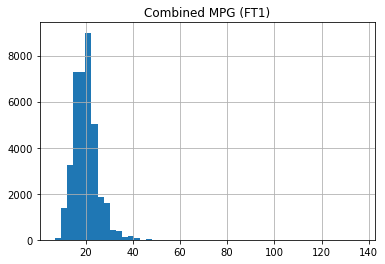

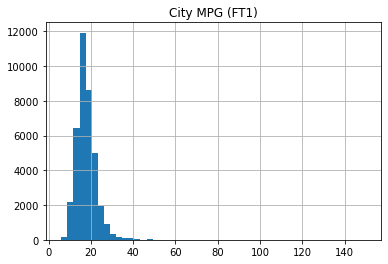

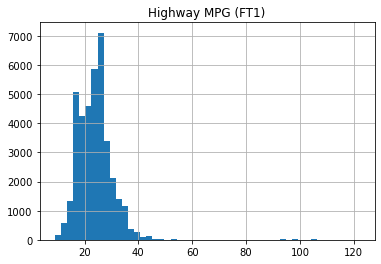

In [52]:
##Plot histogram to ensure data normality for three fuel efficiency metrics
combinedmpg = rawdata_df
citympg = rawdata_df
hwympg = rawdata_df
combined = combinedmpg.hist("Combined MPG (FT1)", bins=50)
city = citympg.hist("City MPG (FT1)", bins=50)
highway = hwympg.hist("Highway MPG (FT1)", bins=50)
print(combined,city,highway)

In [53]:
##create random groups
rawdata_df['rand'] = np.random.randint(1,9, size=len(rawdata_df))

In [54]:
##filter new df to just group 7 and remove non-gasoline motors
randdf = rawdata_df[(rawdata_df.rand==7)]
df = randdf[randdf['Fuel Type 1'].str.contains("Gasoline",na=False)]

In [55]:
##split into test varible
df1 = df[df['Transmission'].str.contains("Manual",na=False)]
df2 = df[df['Transmission'].str.contains("Auto",na=False)]

In [59]:
##cut down columns to just combined MPG
dfmanual = df1["Combined MPG (FT1)"]
dfauto = df2["Combined MPG (FT1)"]

In [60]:
##t test 
ttest_ind(dfmanual,dfauto)

Ttest_indResult(statistic=11.619687065160628, pvalue=8.927252437086793e-31)

In [65]:
##calculate mean MPG and standard deviation for error bars plot
dfmanualmean = np.mean(dfmanual)
dfautomean = np.mean(dfauto)
dfmanualstd = np.std(dfmanual)
dfautostd = np.std(dfauto)

In [70]:
##create lists for the plot
mpg = ['dfmanual','dfauto']
x_pos = np.arange(len(mpg))
mpgs = [dfmanualmean, dfautomean]
error = [dfmanualstd, dfautostd]

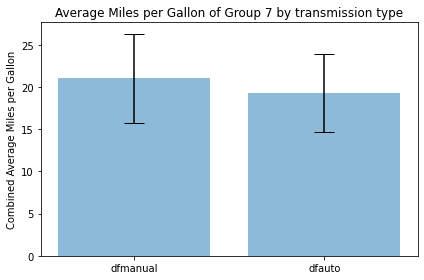

In [72]:
##plot the bars with error ranges
fig, ax = plt.subplots()
ax.bar(x_pos, mpgs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Combined Average Miles per Gallon')
ax.set_xticks(x_pos)
ax.set_xticklabels(mpg)
ax.set_title('Average Miles per Gallon of Group 7 by transmission type')

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()